### Bestof dataviz olist

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
customers= pd.read_csv('olist_customers_dataset.csv')
geolocalisation= pd.read_csv('olist_geolocation_dataset.csv')
order_items= pd.read_csv('olist_order_items_dataset.csv')
order_payements= pd.read_csv('olist_order_payments_dataset.csv')
order_reviews= pd.read_csv('olist_order_reviews_dataset.csv')
orders= pd.read_csv('olist_orders_dataset.csv')
products= pd.read_csv('olist_products_dataset.csv')
sellers= pd.read_csv('olist_sellers_dataset.csv')
name_translation= pd.read_csv('product_category_name_translation.csv')

### Review score correlation

<Axes: xlabel='review_score', ylabel='count'>

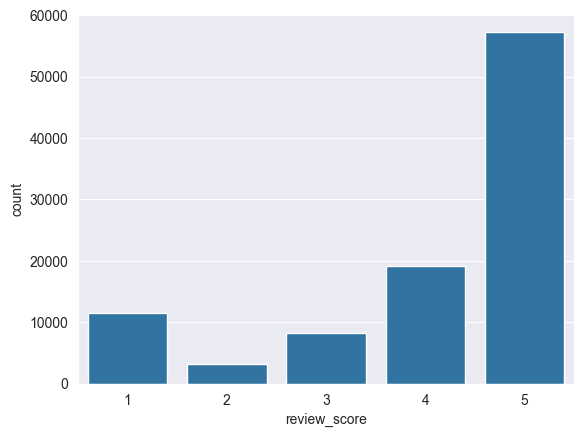

In [7]:
sns.countplot(data = order_reviews, x='review_score')


In [9]:
one_score_reviews = order_reviews[(order_reviews["review_score"] == 1) & (order_reviews["review_comment_message"].notna())]
order_counts = order_items["order_id"].value_counts().reset_index()
order_counts.groupby("order_id")
merged_df = order_reviews.merge(order_counts, on="order_id", how="left")


In [10]:
correlation = merged_df['count'].corr(merged_df['review_score'])
correlation

np.float64(-0.1155670537589946)

In [12]:
merged_payment_by_rating = order_reviews.merge(order_payements, on="order_id", how="left")
merged_payment_by_rating['payment_value'] = merged_payment_by_rating['payment_value'].fillna(0)

In [13]:
filtered_df = merged_payment_by_rating[merged_payment_by_rating['payment_value'] < 200]
correlation = filtered_df['review_score'].corr(filtered_df['payment_value'])
correlation

np.float64(-0.025959344340745205)